In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data ='/content/drive/My Drive/Colab Notebooks/LARP_ASS1/Dataset_1_Team_29.csv'


In [0]:
x=pd.read_csv(data)
x1=x.iloc[:,1].values
x2=x.iloc[:,2].values



In [5]:
x


,Unnamed: 0,X1,X2
0,sample1,57,67
1,sample2,93,83
2,sample3,77,49
3,sample4,19,21
4,sample5,92,77
5,sample6,35,45
6,sample7,46,32
7,sample8,100,88
8,sample9,22,37
9,sample10,81,84


In [6]:
x1_bar=np.mean(x1)
x2_bar=np.mean(x2)
x1_bar,x2_bar

(49.14, 49.18)

In [7]:
x1_std=np.std(x1)
x2_std=np.std(x2)
x1_std,x2_std

(28.361248209484717, 26.704823534335514)

In [8]:
x1_mean_adjusted=(x1-x1_bar)/x1_std
x2_mean_adjusted=(x2-x2_bar)/x2_std
X=np.vstack([x1_mean_adjusted,x2_mean_adjusted])
X
# X5=np.transpose(X)
# X5

array([[ 0.27713872,  1.54647636,  0.9823263 , -1.06271768,  1.51121698,
        -0.49856762, -0.11071445,  1.79329202, -0.95693955,  1.12336382,
         1.05284506, -1.48583023,  1.12336382, -0.28701135,  0.70025127,
        -1.13323644, -0.71012389,  0.62973251, -0.14597383,  1.22914195,
        -1.52108961,  0.1361012 , -1.30953334, -0.25175197, -1.0274583 ,
         1.79329202,  0.17136058, -1.2037552 ,  0.87654816, -0.28701135,
         0.52395437, -0.46330824, -1.09797706, -0.81590203, -0.00493631,
         0.62973251, -0.88642079,  0.10084182, -0.39278948, -0.60434576,
        -0.56908638,  1.26440133, -1.62686775,  2.00484829, -1.48583023,
        -0.99219893, -0.533827  ,  0.17136058,  0.70025127,  1.12336382],
       [ 0.66729518,  1.26643788, -0.00674036, -1.05524008,  1.04175936,
        -0.15652603, -0.64332947,  1.45366997, -0.45609738,  1.30388429,
         1.22899146, -1.24247217,  1.26643788, -0.38120454,  0.55495592,
        -1.39225784, -0.75566873,  0.77963443,  0.

In [0]:
Covariance=np.dot(X,np.transpose(X))
Covariance=Covariance/50

In [10]:

eigvals,eigvecs=np.linalg.eigh(Covariance)
eigvecs
eigvals


array([0.05834219, 1.94165781])

In [0]:

origin = [0], [0] 

In [0]:
k1=eigvecs[:,0]
k2=eigvecs[:,1]

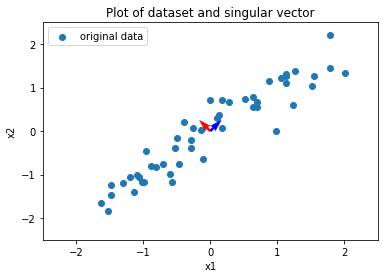

In [13]:
plt.scatter(x1_mean_adjusted, x2_mean_adjusted,label='original data')
plt.title('Plot of dataset and singular vector')
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim(-2.5,2.5)
plt.xlim(-2.5,2.5)
plt.quiver(*origin, *k1, color=['r'], scale=21)
plt.quiver(*origin, *k2, color=['b'], scale=21)
plt.legend()
plt.show()

In [0]:
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[idx,:]


In [15]:
# scalar=np.matmul(np.transpose(eigvecs[0,:]),X)
scalar=np.dot(eigvecs[0,:],X)
# # scalar=np.ravel(scalar)
scalar=np.reshape(scalar,[1,50])
print('scalar',scalar.shape)
vect=np.reshape(eigvecs[0,:],[2,1])
projected=(vect*scalar)
projected.shape
projected=np.transpose(projected)

# projected=np.dot(scalar,np.transpose(vect))

scalar (1, 50)


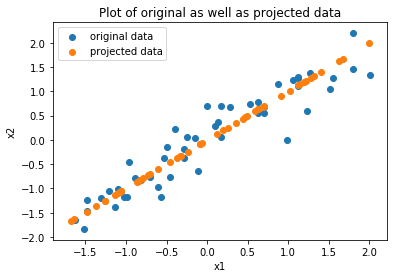

In [16]:
plt.scatter(x1_mean_adjusted, x2_mean_adjusted,label='original data')
plt.title('Plot of original as well as projected data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.legend()
plt.show()

In [17]:
error=np.sum(eigvals[1])
error

0.05834218550505044

In [0]:
#least square solution
X=np.reshape(x1_mean_adjusted,[50,1])
Y=np.reshape(x2_mean_adjusted,[50,1])

M=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
L=np.matmul(X,M)


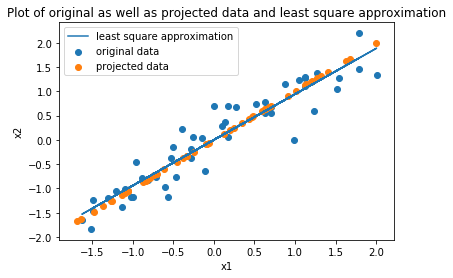

In [19]:
plt.scatter(x1_mean_adjusted, x2_mean_adjusted,label='original data')
plt.title('Plot of original as well as projected data and least square approximation')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.plot(X,L,label='least square approximation')
plt.legend()
plt.show()

In [0]:
diff=Y-L
err_OLS=(np.linalg.norm(diff,2)**2)/50

     
      

In [21]:
err_OLS

0.11328056040059462